Попытки доказать Colab, что я не трачу бездарно его ресурсы (автоклик)

In [ ]:
from IPython.display import Javascript
Javascript('''
function KeepAlive() {
  console.log("Поддержание активности Colab");
  document.querySelector("colab-toolbar-button").click();
  setTimeout(KeepAlive, 15*60*1000);  // Клик каждые 15 минут
}
KeepAlive();
''')

<IPython.core.display.Javascript object>

## **Что изменилось?**
Поменяла соотношение между val_ratio/test_ratio, потому что датасет очень маленький. Смягчила предобработку, добавила blur в трансформации. Добавила dropout

torchmetrics нужно устанавливать

In [1]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

## **Клонирование репозитория или подтягивание обновлений**

In [2]:
# Клонирование репозитория
import os
if not os.path.exists('skin_lesion_segmentation'):
    !git clone https://github.com/Marianicko/skin_lesion_segmentation.git
else:
    %cd skin_lesion_segmentation
    !git pull
    %cd ..



Cloning into 'skin_lesion_segmentation'...
remote: Enumerating objects: 748, done.
remote: Total 748 (delta 0), reused 0 (delta 0), pack-reused 748 (from 1)
Receiving objects: 100% (748/748), 281.79 MiB | 16.18 MiB/s, done.
Resolving deltas: 100% (405/405), done.
Updating files: 100% (488/488), done.


Можно посмотреть последние коммиты:

In [ ]:
# Проверка последних коммитов (опционально)
from git import Repo
repo = Repo('skin_lesion_segmentation')
print("Последние коммиты:")
for commit in list(repo.iter_commits('master', max_count=3)):
    print(f"{commit.hexsha[:7]} - {commit.message}")

Последние коммиты:
5bbdd57 - Убрала косяк с подсчётом train_iou

3c7b47e - final changes

396a3a3 - поправила пути



Пути до src и корня будем использовать ниже, добавим их в PATH

In [3]:
import sys
import os
# Правильное добавление пути к модулям
repo_path = '/content/skin_lesion_segmentation'
src_path = os.path.join(repo_path, 'src')
sys.path.insert(0, repo_path)  # Добавляем корень репозитория
sys.path.insert(0, src_path)  # Добавляем папку src

# Проверка содержимого папки src (для отладки)
print("Содержимое папки src:")
print(os.listdir(src_path))

# Проверка путей (для отладки)
print("\nПути поиска модулей:")
for path in sys.path:
    print(path)

Содержимое папки src:
['dd.py', 'preprocess.py', 'metric.py', 'unet_2405.py', 'dataset_upd_2205.py', 'train.py', 'train_2405.py', 'config.py', 'unet.py', 'dataset_upd_1505.py', 'train_2305.py', 'checkpointer_2205.py', 'model.py', 'train_new_2005.py', 'test_preprocessing.py', 'preprocess_hb.py', 'visualizations', 'dataset_upd_2405.py', 'preprocess_spec_2005.py', 'train_2205.py', 'train_2005.py', '__pycache__', 'utils.py', 'dataset_upd_2305.py', 'checkpoints', 'preprocess_spec_2305.py', 'logs', 'dataset_cur.py', 'checkpointer.py', 'preprocess_spec.py', '.ipynb_checkpoints', 'visualize.ipynb', 'loss.py', 'dataset_upd_2005.py', 'text', 'dataset_upd.py', 'train_old.py']

Пути поиска модулей:
/content/skin_lesion_segmentation/src
/content/skin_lesion_segmentation
/content
/env/python
/usr/lib/python311.zip
/usr/lib/python3.11
/usr/lib/python3.11/lib-dynload

/usr/local/lib/python3.11/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.11/dist-packages/IPython/extensions
/root

## Импорты модулей с GitHub

In [4]:
from dataset_upd_2405 import get_datasets
from model import SegmentationModel
from config import Config
from train_2405 import train, evaluate
from preprocess_spec_2305 import DermatologyPreprocessor

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Проверяем доступность GPU:

In [ ]:
import torch
print("Доступен GPU:", torch.cuda.is_available())
Config.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("Устройство для обучения:", Config.DEVICE)

Доступен GPU: True
Устройство для обучения: cuda


# Внимание!
Нужно будет поменять настройки конфигурационного файла (там директории указаны таким образом, чтобы в PyCharm запускать)

In [5]:
Config.IMAGES_DIR = "/content/skin_lesion_segmentation/PH2_Dataset/trainx"
Config.MASKS_DIR = "/content/skin_lesion_segmentation/PH2_Dataset/trainy"

Проверили, что папки есть и они непусты

In [6]:
from pathlib import Path

# Укажите правильные пути (пример для Colab)
print(Config.BATCH_SIZE)

# Создаём папки, если их нет
Path(Config.IMAGES_DIR).mkdir(parents=True, exist_ok=True)
Path(Config.MASKS_DIR).mkdir(parents=True, exist_ok=True)

# Проверка данных
assert len(os.listdir(Config.IMAGES_DIR)) > 0, "Нет изображений!"
assert len(os.listdir(Config.MASKS_DIR)) > 0, "Нет масок!"
print(f"Найдено {len(os.listdir(Config.IMAGES_DIR))} изображений и {len(os.listdir(Config.MASKS_DIR))} масок")

4
Найдено 200 изображений и 200 масок


(Тут была диагностика, вставь при необходимости)

In [7]:
Config.LOGS_DIR = "/content/skin_lesion_segmentation/logs"
Config.CHECKPOINTS_DIR = "/content/skin_lesion_segmentation/checkpoints"

## **Настройка весов модели**
Рассказать про подбор

In [8]:
Config.CLASS_WEIGHTS = [0.7, 0.3]

## **Функция для визуализации результатов:**

Прошлый вариант plot_training_curves сталкивался с ошибкой - несоответствие размеров массивов. Исправляем:

In [9]:
import matplotlib.pyplot as plt

In [10]:
def plot_training_curves(log_dir=Config.LOGS_DIR):
    import pandas as pd
    from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

    # Загружаем данные из TensorBoard
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()

    # Собираем метрики с проверкой наличия
    metrics = {}
    for tag in ['Loss_train', 'Loss_val', 'IoU/val', 'Best_IoU', 'Best_Loss']:
        if tag in event_acc.Tags()['scalars']:
            metrics[tag] = [e.value for e in event_acc.Scalars(tag)]
        else:
            print(f"Предупреждение: метрика {tag} не найдена в логах")
            metrics[tag] = []

    # Определяем общее количество эпох
    max_length = max(len(metrics[tag]) for tag in metrics) if metrics else 0
    if max_length == 0:
        print("Нет данных для визуализации")
        return

    # Выравниваем массивы по длине
    aligned_metrics = {}
    for tag in metrics:
        if len(metrics[tag]) < max_length:
            aligned_metrics[tag] = metrics[tag] + [None] * (max_length - len(metrics[tag]))
        else:
            aligned_metrics[tag] = metrics[tag][:max_length]

    # Создаем DataFrame
    df = pd.DataFrame({
        'epoch': range(max_length),
        'train_loss': aligned_metrics.get('Loss_train', [None]*max_length),
        'val_loss': aligned_metrics.get('Loss_val', [None]*max_length),
        'val_iou': aligned_metrics.get('IoU/val', [None]*max_length),
        'best_iou': aligned_metrics.get('Best_IoU', [None]*max_length),
        'best_loss': aligned_metrics.get('Best_Loss', [None]*max_length)
    }).dropna(how='all', subset=['train_loss', 'val_loss'])  # Удаляем пустые строки

    if df.empty:
        print("Нет данных для построения графиков")
        return

    # Рисуем графики
    plt.figure(figsize=(15, 5))

    # График Loss
    plt.subplot(1, 2, 1)
    plt.plot(df['epoch'], df['train_loss'], label='Train Loss')
    plt.plot(df['epoch'], df['val_loss'], label='Val Loss')
    if not df['best_loss'].isnull().all():
        plt.plot(df['epoch'], df['best_loss'], '--', label='Best Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # График IoU
    plt.subplot(1, 2, 2)
    if not df['val_iou'].isnull().all():
        plt.plot(df['epoch'], df['val_iou'], label='Val IoU')
    if not df['best_iou'].isnull().all():
        plt.plot(df['epoch'], df['best_iou'], '--', label='Best IoU')
    plt.xlabel('Epoch')
    plt.ylabel('IoU')
    plt.legend()

    plt.tight_layout()
    plt.show()

##**Настройки обучения**
Можно выбрать - включать предобработку или нет (по умолчанию предобработка включена, эпох 50, но это было убийственно для предобработанных изображений, поэтому 25)

In [11]:
Config.EPOCHS = 25
Config.PREPROCESS_FLAG = False

In [12]:
print(Config.EPOCHS, Config.PREPROCESS_FLAG, Config.LOGS_DIR)

25 False /content/skin_lesion_segmentation/logs


Тренировка + валидация:

It's okay


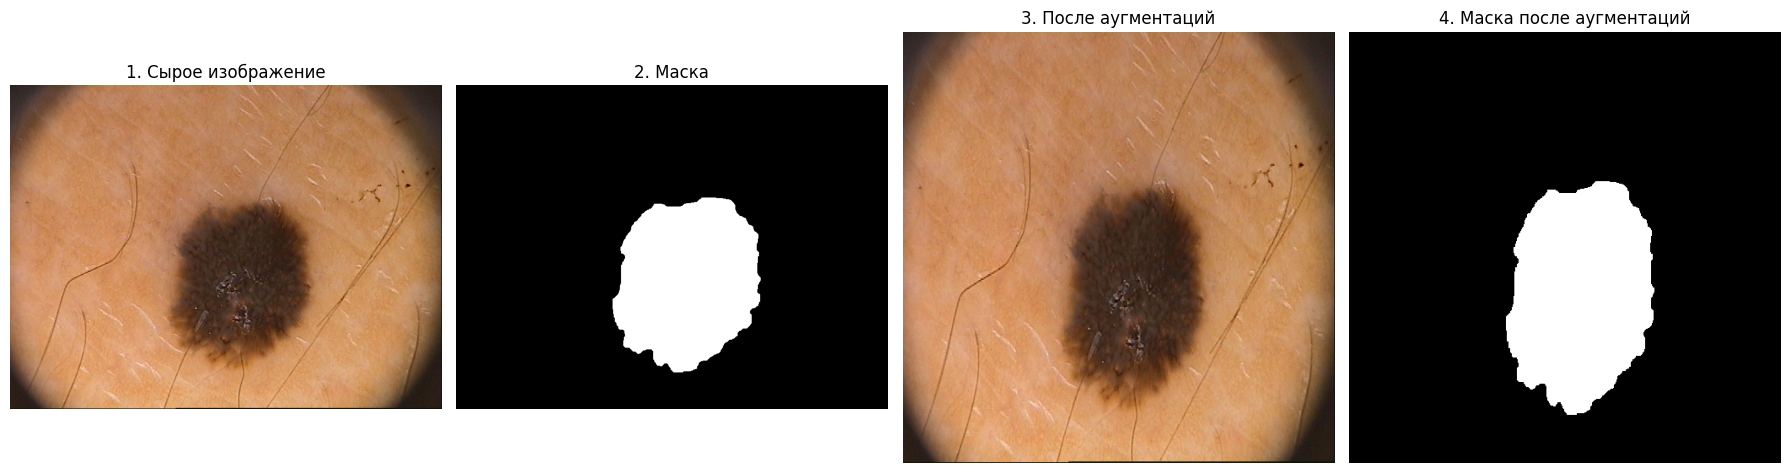

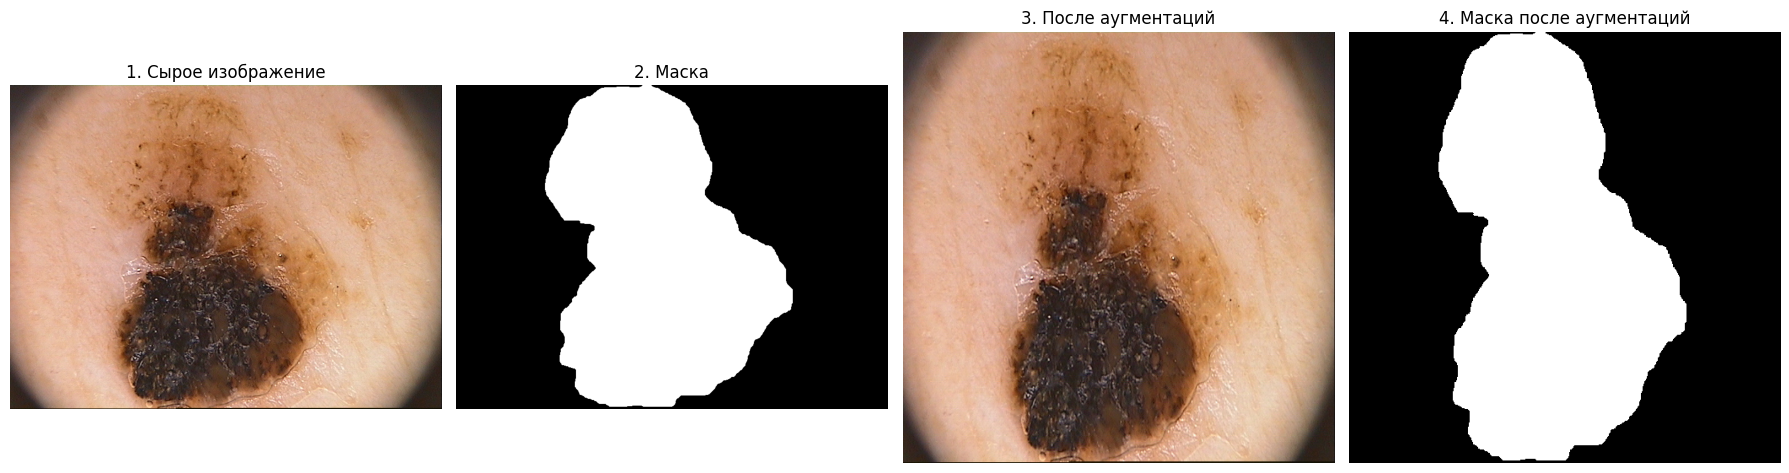

Epoch 1: 100%|██████████| 40/40 [00:17<00:00,  2.30it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.6724, Loss=0.4793 (epoch 1)


Epoch 1/25 | Train Loss: 0.5845 | Val Loss: 0.4793 | Val IoU: 0.6724 | LR = 1.00e-04 | Best IoU: 0.6724 | Best Loss: 0.4793


Epoch 2: 100%|██████████| 40/40 [00:15<00:00,  2.55it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.7866, Loss=0.3587 (epoch 2)


Epoch 2/25 | Train Loss: 0.4293 | Val Loss: 0.3587 | Val IoU: 0.7866 | LR = 1.00e-04 | Best IoU: 0.7866 | Best Loss: 0.3587


Epoch 3: 100%|██████████| 40/40 [00:15<00:00,  2.50it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.7866, Loss=0.3587 (epoch 2)


Epoch 3/25 | Train Loss: 0.3596 | Val Loss: 0.3521 | Val IoU: 0.7746 | LR = 1.00e-04 | Best IoU: 0.7866 | Best Loss: 0.3521


Epoch 4: 100%|██████████| 40/40 [00:16<00:00,  2.48it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8049, Loss=0.2495 (epoch 4)


Epoch 4/25 | Train Loss: 0.3287 | Val Loss: 0.2495 | Val IoU: 0.8049 | LR = 1.00e-04 | Best IoU: 0.8049 | Best Loss: 0.2495


Epoch 5: 100%|██████████| 40/40 [00:16<00:00,  2.42it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8049, Loss=0.2495 (epoch 4)


Epoch 5/25 | Train Loss: 0.3052 | Val Loss: 0.2553 | Val IoU: 0.7922 | LR = 1.00e-04 | Best IoU: 0.8049 | Best Loss: 0.2495


Epoch 6: 100%|██████████| 40/40 [00:17<00:00,  2.35it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8049, Loss=0.2495 (epoch 4)


Epoch 6/25 | Train Loss: 0.3149 | Val Loss: 0.2989 | Val IoU: 0.7397 | LR = 1.00e-04 | Best IoU: 0.8049 | Best Loss: 0.2495


Epoch 7: 100%|██████████| 40/40 [00:17<00:00,  2.34it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8049, Loss=0.2495 (epoch 4)


Epoch 7/25 | Train Loss: 0.2563 | Val Loss: 0.2431 | Val IoU: 0.7918 | LR = 1.00e-04 | Best IoU: 0.8049 | Best Loss: 0.2431


Epoch 8: 100%|██████████| 40/40 [00:17<00:00,  2.27it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8049, Loss=0.2495 (epoch 4)


Epoch 8/25 | Train Loss: 0.2486 | Val Loss: 0.2125 | Val IoU: 0.7856 | LR = 1.00e-04 | Best IoU: 0.8049 | Best Loss: 0.2125


Epoch 9: 100%|██████████| 40/40 [00:17<00:00,  2.27it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8049, Loss=0.2495 (epoch 4)


Epoch 9/25 | Train Loss: 0.2452 | Val Loss: 0.2080 | Val IoU: 0.8021 | LR = 1.00e-04 | Best IoU: 0.8049 | Best Loss: 0.2080


Epoch 10: 100%|██████████| 40/40 [00:17<00:00,  2.29it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8111, Loss=0.2308 (epoch 10)


Epoch 10/25 | Train Loss: 0.2589 | Val Loss: 0.2308 | Val IoU: 0.8111 | LR = 1.00e-04 | Best IoU: 0.8111 | Best Loss: 0.2080


Epoch 11: 100%|██████████| 40/40 [00:17<00:00,  2.30it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8170, Loss=0.2679 (epoch 11)


Epoch 11/25 | Train Loss: 0.2284 | Val Loss: 0.2679 | Val IoU: 0.8170 | LR = 1.00e-04 | Best IoU: 0.8170 | Best Loss: 0.2080


Epoch 12: 100%|██████████| 40/40 [00:17<00:00,  2.29it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8170, Loss=0.2679 (epoch 11)


Epoch 12/25 | Train Loss: 0.2389 | Val Loss: 0.2200 | Val IoU: 0.7787 | LR = 1.00e-04 | Best IoU: 0.8170 | Best Loss: 0.2080


Epoch 13: 100%|██████████| 40/40 [00:17<00:00,  2.28it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8170, Loss=0.2679 (epoch 11)


Epoch 13/25 | Train Loss: 0.2289 | Val Loss: 0.2141 | Val IoU: 0.8067 | LR = 1.00e-04 | Best IoU: 0.8170 | Best Loss: 0.2080


Epoch 14: 100%|██████████| 40/40 [00:17<00:00,  2.28it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8170, Loss=0.2679 (epoch 11)


Epoch 14/25 | Train Loss: 0.2297 | Val Loss: 0.1994 | Val IoU: 0.8090 | LR = 1.00e-04 | Best IoU: 0.8170 | Best Loss: 0.1994


Epoch 15: 100%|██████████| 40/40 [00:17<00:00,  2.29it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8170, Loss=0.2679 (epoch 11)


Epoch 15/25 | Train Loss: 0.2307 | Val Loss: 0.1854 | Val IoU: 0.7835 | LR = 1.00e-04 | Best IoU: 0.8170 | Best Loss: 0.1854


Epoch 16: 100%|██████████| 40/40 [00:17<00:00,  2.29it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8205, Loss=0.1770 (epoch 16)


Epoch 16/25 | Train Loss: 0.2154 | Val Loss: 0.1770 | Val IoU: 0.8205 | LR = 1.00e-04 | Best IoU: 0.8205 | Best Loss: 0.1770


Epoch 17: 100%|██████████| 40/40 [00:17<00:00,  2.29it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8205, Loss=0.1770 (epoch 16)


Epoch 17/25 | Train Loss: 0.2221 | Val Loss: 0.2354 | Val IoU: 0.8059 | LR = 1.00e-04 | Best IoU: 0.8205 | Best Loss: 0.1770


Epoch 18: 100%|██████████| 40/40 [00:17<00:00,  2.29it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8205, Loss=0.1770 (epoch 16)


Epoch 18/25 | Train Loss: 0.2377 | Val Loss: 0.1885 | Val IoU: 0.8191 | LR = 1.00e-04 | Best IoU: 0.8205 | Best Loss: 0.1770


Epoch 19: 100%|██████████| 40/40 [00:17<00:00,  2.29it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8205, Loss=0.1770 (epoch 16)


Epoch 19/25 | Train Loss: 0.2349 | Val Loss: 0.2095 | Val IoU: 0.7989 | LR = 1.00e-04 | Best IoU: 0.8205 | Best Loss: 0.1770


Epoch 20: 100%|██████████| 40/40 [00:17<00:00,  2.29it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8274, Loss=0.1757 (epoch 20)


Epoch 20/25 | Train Loss: 0.2060 | Val Loss: 0.1757 | Val IoU: 0.8274 | LR = 1.00e-04 | Best IoU: 0.8274 | Best Loss: 0.1757


Epoch 21: 100%|██████████| 40/40 [00:17<00:00,  2.28it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8274, Loss=0.1757 (epoch 20)


Epoch 21/25 | Train Loss: 0.2161 | Val Loss: 0.1712 | Val IoU: 0.8152 | LR = 1.00e-04 | Best IoU: 0.8274 | Best Loss: 0.1712


Epoch 22: 100%|██████████| 40/40 [00:17<00:00,  2.29it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8431, Loss=0.1803 (epoch 22)


Epoch 22/25 | Train Loss: 0.1998 | Val Loss: 0.1803 | Val IoU: 0.8431 | LR = 1.00e-04 | Best IoU: 0.8431 | Best Loss: 0.1712


Epoch 23: 100%|██████████| 40/40 [00:17<00:00,  2.26it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8431, Loss=0.1803 (epoch 22)


Epoch 23/25 | Train Loss: 0.2035 | Val Loss: 0.1560 | Val IoU: 0.8320 | LR = 1.00e-04 | Best IoU: 0.8431 | Best Loss: 0.1560


Epoch 24: 100%|██████████| 40/40 [00:17<00:00,  2.29it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8431, Loss=0.1803 (epoch 22)


Epoch 24/25 | Train Loss: 0.2304 | Val Loss: 0.1882 | Val IoU: 0.8149 | LR = 1.00e-04 | Best IoU: 0.8431 | Best Loss: 0.1560


Epoch 25: 100%|██████████| 40/40 [00:17<00:00,  2.29it/s]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8431, Loss=0.1803 (epoch 22)


Epoch 25/25 | Train Loss: 0.2051 | Val Loss: 0.2016 | Val IoU: 0.8199 | LR = 1.00e-04 | Best IoU: 0.8431 | Best Loss: 0.1560
Training completed!
Доступные метрики в логах: ['IoU/val', 'Best_IoU', 'Best_Loss', 'Loss_train', 'Loss_val', 'LR']


In [13]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

try:
  model = train()
finally:
  # Проверка содержимого логов
  event_acc = EventAccumulator(Config.LOGS_DIR)
  event_acc.Reload()
  print("Доступные метрики в логах:", event_acc.Tags()['scalars'])


In [14]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Проверка содержимого логов
event_acc = EventAccumulator(Config.LOGS_DIR)
event_acc.Reload()
print("Доступные метрики в логах:", event_acc.Tags()['scalars'])

Доступные метрики в логах: ['IoU/val', 'Best_IoU', 'Best_Loss', 'Loss_train', 'Loss_val', 'LR']


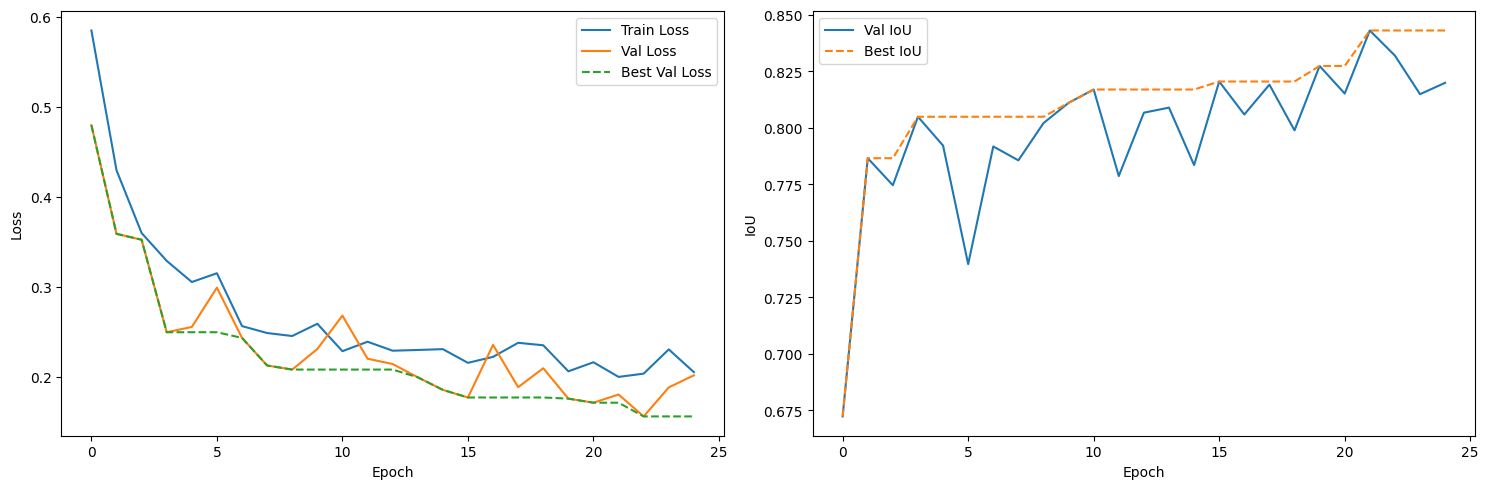

In [15]:
plot_training_curves()

Посмотрим на логи и **почистим** их:

In [ ]:
!ls -la {Config.LOGS_DIR}

total 184
drwxr-xr-x  4 root root   4096 May 24 11:43 .
drwxr-xr-x 10 root root   4096 May 24 11:26 ..
-rw-r--r--  1 root root 170555 May 24 11:45 events.out.tfevents.1748086940.25be5f1c06d3.197.9
drwxr-xr-x  2 root root   4096 May 24 11:43 Loss_train
drwxr-xr-x  2 root root   4096 May 24 11:43 Loss_val


Посмотреть, как показала себя модель, обученная на сырых данных, можно в отдельной тетрадочке

In [ ]:
!rm -rf {Config.LOGS_DIR}/*

In [ ]:
!ls -la {Config.LOGS_DIR}

total 8
drwxr-xr-x  2 root root 4096 May 24 11:45 .
drwxr-xr-x 10 root root 4096 May 24 11:26 ..


##Сохранение:

In [ ]:
from google.colab import drive
try:
    drive.mount('/content/drive', force_remount=True)
    torch.save(model.state_dict(), '/content/drive/MyDrive/final_model.pt')
    !cp -r "/content/skin_lesion_segmentation/logs" "/content/drive/MyDrive/"
except Exception as e:
    print(f"Ошибка сохранения: {e}")
    !zip -r logs.zip /content/skin_lesion_segmentation/logs
    files.download('logs.zip')  # Альтернативное сохранение

Mounted at /content/drive


##**Тестирование:**

In [16]:
from torch.utils.data import DataLoader
from tqdm import tqdm
from metric import MeanIoU
import numpy as np

In [17]:
print(Config.VAL_RATIO, Config.TEST_RATIO)

0.1 0.1


In [18]:
    _, _, test_dataset = get_datasets(
        images_dir=Config.IMAGES_DIR,
        masks_dir=Config.MASKS_DIR,
        val_ratio=Config.VAL_RATIO,
        test_ratio=Config.TEST_RATIO,
        preprocess=Config.PREPROCESS_FLAG,
        crop_borders=True
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=Config.BATCH_SIZE,
        num_workers=Config.NUM_WORKERS,
        pin_memory=True
    )

    test_iou = evaluate(model, test_loader)
    print(f"\nTest IoU: {test_iou:.4f}")

It's okay

Test IoU: 0.8316


In [20]:
def test_model(model, test_loader):
    model.eval()
    test_ious = []
    device = Config.DEVICE
    metric_fn = MeanIoU(classes_num=Config.NUM_CLASSES, ignore_index=-1).to(device)
    with torch.no_grad():
        for images, masks in tqdm(test_loader):
            outputs = model(images.to(device))
            iou = metric_fn(outputs, masks.to(device)).item()
            test_ious.append(iou)
    print(f"\nMean Test IoU: {np.mean(test_ious):.4f} ± {np.std(test_ious):.4f}")
    return test_ious

test_ious = test_model(model, test_loader)

100%|██████████| 5/5 [00:01<00:00,  3.54it/s]


Mean Test IoU: 0.8264 ± 0.0774


Расширенное тестирование:

In [21]:
from torchmetrics.classification import BinaryJaccardIndex as JaccardIndex
from torchmetrics.classification import BinaryF1Score as Dice
from torchmetrics import Precision, Recall
from collections import defaultdict

from prettytable import PrettyTable


def extended_evaluation(model, loader):
    device = next(model.parameters()).device

    metrics = {
        'iou': JaccardIndex().to(device),
        'dice': Dice().to(device),
        'precision': Precision(task='binary').to(device),
        'recall': Recall(task='binary').to(device)
    }

    results = defaultdict(list)

    with torch.no_grad():
        for images, masks in tqdm(loader, desc="Evaluation"):
            images = images.to(device)
            masks = masks.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)

            for name, metric in metrics.items():
                results[name].append(metric(preds, masks).item())

    return {name: np.mean(vals) for name, vals in results.items()}

def full_evaluation(model, datasets):
    model.eval()
    results = {}

    # Собираем метрики для всех датасетов
    for name, dataset in datasets.items():
        loader = DataLoader(
            dataset,
            batch_size=Config.BATCH_SIZE,
            num_workers=0,
            pin_memory=True
        )
        results[name] = extended_evaluation(model, loader)

    # Создаем и настраиваем таблицу
    table = PrettyTable()
    table.field_names = ["Метрика", "Train", "Val", "Test"]
    table.align["Метрика"] = "l"  # Выравнивание по левому краю
    table.align["Train"] = "r"     # Выравнивание по правому краю
    table.align["Val"] = "r"
    table.align["Test"] = "r"
    table.float_format = ".4"      # Формат чисел (4 знака после запятой)

    # Добавляем строки с метриками
    for metric in results['train'].keys():
        row = [metric.replace('_', ' ').title()]  # Преобразуем snake_case в нормальный вид
        for dataset in ['train', 'val', 'test']:
            row.append(results[dataset][metric])
        table.add_row(row)

    # Выводим таблицу с заголовком
    print("\n" + "="*50)
    print("РЕЗУЛЬТАТЫ ОЦЕНКИ МОДЕЛИ".center(50))
    print("="*50)
    print(table)
    print("="*50 + "\n")

    return results

Расширенная оценка:

In [24]:
    train_ds, val_ds, test_ds = get_datasets(
        images_dir=Config.IMAGES_DIR,
        masks_dir=Config.MASKS_DIR,
        val_ratio=Config.VAL_RATIO,
        test_ratio=Config.TEST_RATIO,
        #preprocess=Config.PREPROCESS_FLAG,
        preprocess=False,
        crop_borders=True
    )

    # Вызываем полную оценку
    datasets = {
        'train': train_ds,
        'val': val_ds,
        'test': test_ds
    }

    metrics = full_evaluation(model, datasets)

It's okay


Evaluation: 100%|██████████| 5/5 [00:00<00:00,  6.21it/s]


             РЕЗУЛЬТАТЫ ОЦЕНКИ МОДЕЛИ             
+-----------+--------+--------+--------+
| Метрика   |  Train |    Val |   Test |
+-----------+--------+--------+--------+
| Iou       | 0.7639 | 0.7447 | 0.7554 |
| Dice      | 0.8616 | 0.8446 | 0.8555 |
| Precision | 0.9199 | 0.8684 | 0.9053 |
| Recall    | 0.8266 | 0.8593 | 0.8172 |
+-----------+--------+--------+--------+



Визуализация предсказаний:

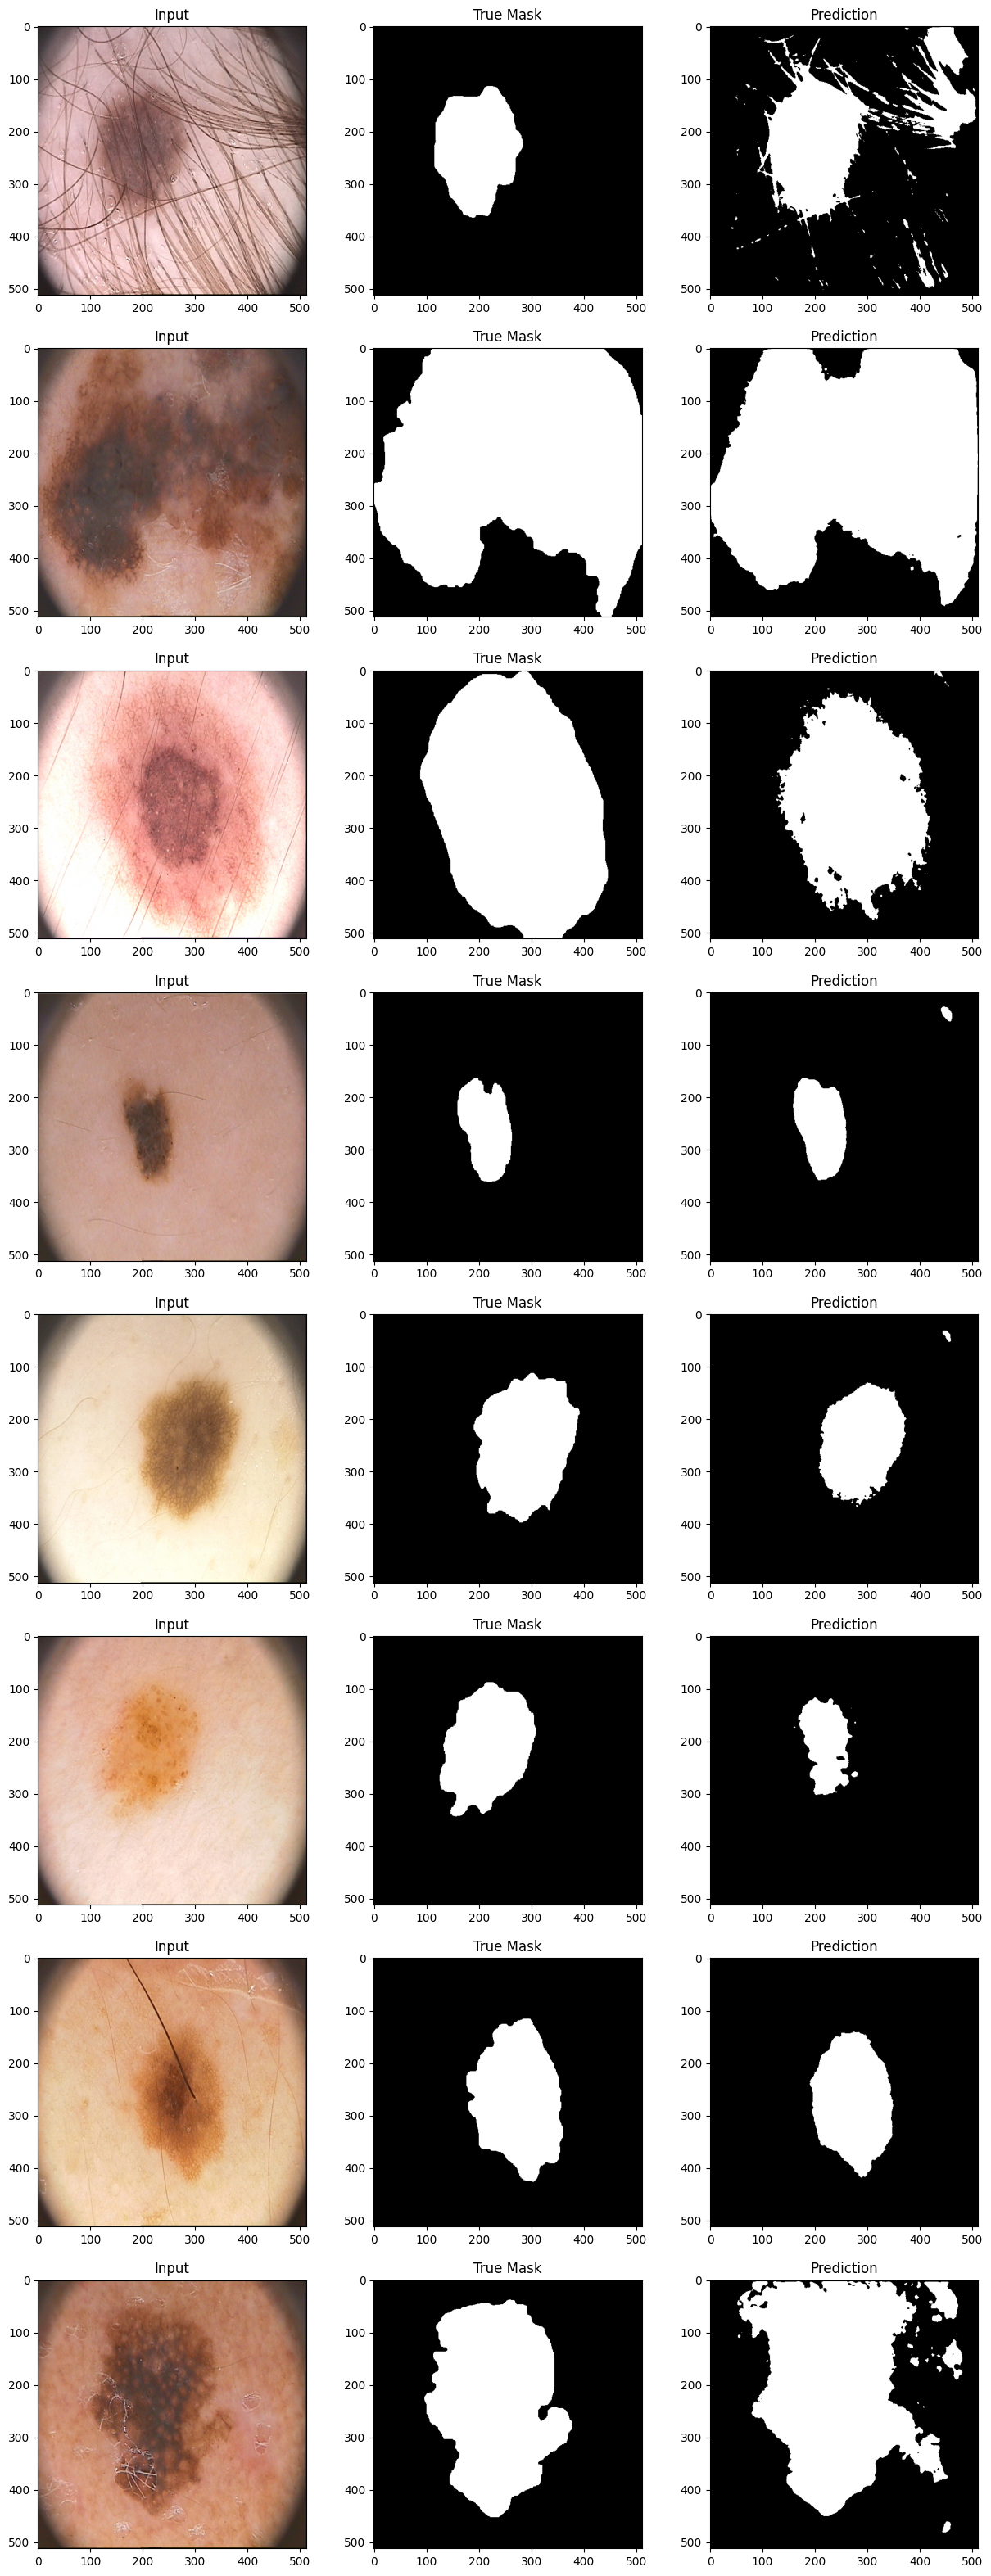

In [23]:
def show_predictions(model, dataset, n=3):
    model.eval()
    fig, axes = plt.subplots(n, 3, figsize=(15, n*5))
    device = Config.DEVICE
    for i in range(n):
        img, true_mask = dataset[i]
        with torch.no_grad():
            pred = model(img.unsqueeze(0).to(device)).argmax(1).squeeze().cpu()

        axes[i, 0].imshow(img.permute(1, 2, 0))
        axes[i, 1].imshow(true_mask.squeeze(), cmap='gray')
        axes[i, 2].imshow(pred, cmap='gray')

        axes[i, 0].set_title("Input")
        axes[i, 1].set_title("True Mask")
        axes[i, 2].set_title("Prediction")
    plt.show()

show_predictions(model, test_dataset, 8)

**Очистка** перед повторным запуском:

In [ ]:
!rm -rf {Config.LOGS_DIR}/*

In [ ]:
!ls -la {Config.LOGS_DIR}

total 8
drwxr-xr-x  2 root root 4096 May 23 12:14 .
drwxr-xr-x 10 root root 4096 May 23 11:45 ..


Посмотреть на эпоху с meanIoU == 0.49

Хорошо бы посмотреть, какие вообще результаты даёт базовая юнет и подумать про модификации (поискать статьи)

In [ ]:
print("Congrats!")

In [ ]:
exit()